In [20]:
!pip install tensorflow


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [21]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as pyplot
import numpy as numpy
%matplotlib inline

In [22]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [23]:
len(X_train)

60000

In [24]:
len(X_test)

10000

In [25]:
X_train[0].shape

(28, 28)

In [26]:
#to view the simple two-dimension array
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [27]:
# the zeros are the blank points while the nubers are the white points
# to properly view it use  matplotlib

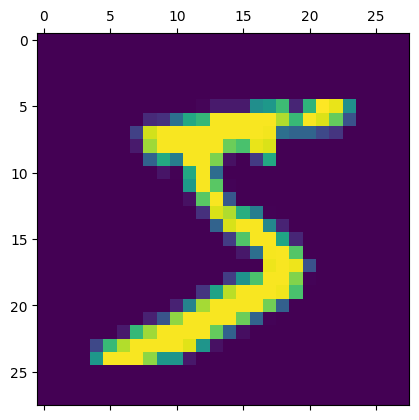

In [28]:
import matplotlib.pyplot as plt
plt.matshow(X_train[0])

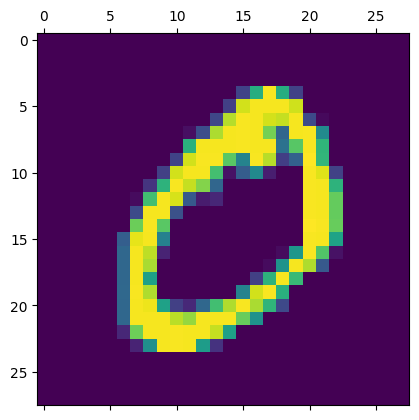

In [29]:
plt.matshow(X_train[1])

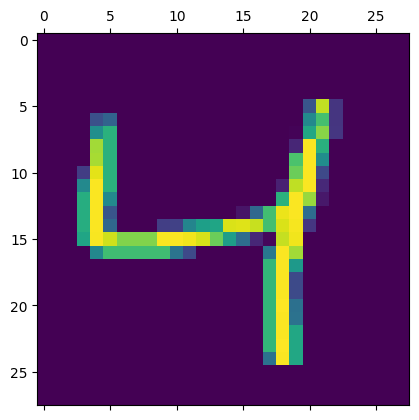

In [30]:
plt.matshow(X_train[2])

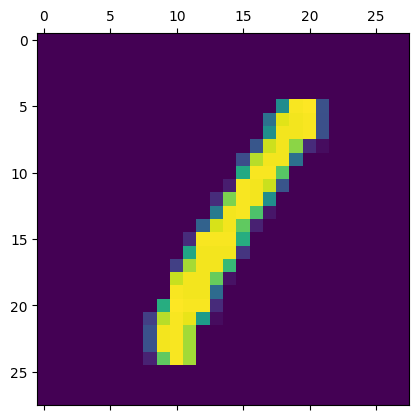

In [31]:
plt.matshow(X_train[3])

In [32]:
y_train[2]

4

In [33]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [34]:
X_train.shape

(60000, 28, 28)

In [36]:
#flatten our trainig datasets
#using pandas we reshape
X_train_flat = X_train.reshape(len(X_train),28*28)

In [37]:
X_train_flat.shape

(60000, 784)

In [38]:
X_test_flat = X_test.reshape(len(X_test), 28*28)
X_test_flat.shape

(10000, 784)

In [39]:
X_train_flat[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [41]:
# create a simple neural network
#784 input layers and 10 output layers
# we use keras.sequential which means stack of layers, which accept every layer as one element
# dense means that every layer is connected with every other layer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation= 'sigmoid')#output layer 10
])#activation as sigmoid, saved in model
#compiling is a must do at all times
# this is where you compile neural network and pass bunch of arguments
# optimizers allows you to train eficiently and for backward propagation when training is going on
# optimizer reach global optimal in efficient way
# loss function is categorical since our output is between 0-9
# sparse since it wasn't onehot encoded and it is an integer
# if you check tensorflow documentation, you can see the different loss function
'''Backpropagation is a process involved in training a neural
 network. It involves taking the error rate of a forward 
 propagation and feeding this loss backward through the neural
  network layers to fine-tune the weights. 
Backpropagation is the essence of neural net training.'''
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"]
)
# accuracy is the metric when nnetwork is compiling to make it more accurate
#fit is where the training happens
# number of iterations and repetition of your network to train
model.fit(X_train_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.3396 - accuracy: 0.8416
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.0538 - accuracy: 0.8792
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6210 - accuracy: 0.8840
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.5115 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4256 - accuracy: 0.8872


In [42]:
# as the accuracy increases, the loss function reduces
# to get high accuracy it is advisable to scale your data
# to scale the array divide by 255 since that is the range of the values we have 0-255
# we back up and divide X_train by 255 before flatten it
X_train = X_train / 255
X_test = X_test / 255
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)
print(X_train.shape, X_test_flat.shape)

(60000, 28, 28) (10000, 784)


In [43]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [44]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation= 'sigmoid')#output layer 10
])#activation as sigmoid, saved in model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"]
)

model.fit(X_train_flat, y_train, epochs = 5)

Epoch 1/5


2023-11-09 19:48:04.419679: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.4657 - accuracy: 0.8793
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3034 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2661 - accuracy: 0.9259


In [45]:
#phew our accuracy has been improved and we have accuracy of 92%
# which means our model makes accurate prediction on 92% of time
#now we evaluate the accuracy on test dataset
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 960us/step - loss: 0.2655 - accuracy: 0.9265


[0.2654966711997986, 0.9265000224113464]

In [48]:
#we have a 92.65% accuracy in the model
# since it is a simple nnetworkit took less time for training
y_pred = model.predict(X_test_flat)

313/313 [==============================] - 0s 1ms/step


In [50]:
#predict only first image
y_pred[0]

array([2.4477636e-02, 3.6228704e-07, 3.0451894e-02, 9.6069932e-01,
       2.6045858e-03, 1.1162524e-01, 1.3192015e-06, 9.9976289e-01,
       8.0666877e-02, 6.6455823e-01], dtype=float32)

In [52]:
# we can see that it is still printing the ten output scores
# to get maximum score
import numpy as np
np.argmax(y_pred[0])

7

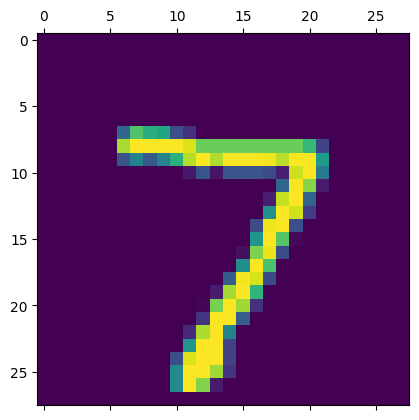

In [53]:
# we can see that it is 7
#now let's confirm if it was indeed 7
plt.matshow(X_test[0])

In [57]:
#we can check for the next number
#predict only second image
y_pred[1]


array([4.6666425e-01, 4.4186320e-03, 9.9942958e-01, 3.0847651e-01,
       4.5286519e-10, 8.1385487e-01, 9.2126638e-01, 1.6792005e-12,
       1.4503555e-01, 2.0356568e-09], dtype=float32)

In [58]:
# we can see that it is still printing the ten output scores
# to get maximum score
import numpy as np
np.argmax(y_pred[1])

2

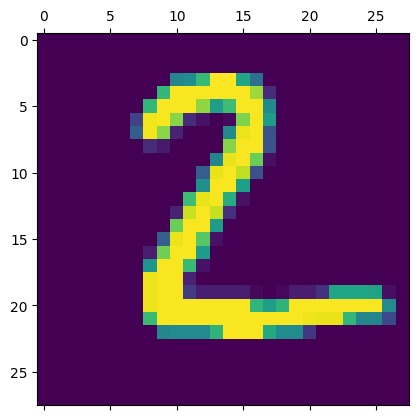

In [59]:
# we can see that it is 7
#now let's confirm if it was indeed 7
plt.matshow(X_test[1])

In [66]:
# to see all use confusion matrix
import tensorflow as tf
# to use y_pred we need to convert to whole values 
# by creating new arrays out of existing arrays
y_lab = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_lab)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    6,    7,    3,    2,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   6,   10,  917,   18,    8,    5,   13,   10,   41,    4],
       [   3,    0,   16,  929,    0,   20,    3,   10,   21,    8],
       [   1,    1,    2,    1,  914,    0,   13,    4,   10,   36],
       [   9,    3,    3,   37,    9,  770,   20,    7,   28,    6],
       [   9,    3,    5,    1,    7,    9,  921,    2,    1,    0],
       [   1,    6,   21,    8,    7,    1,    0,  948,    1,   35],
       [   5,    8,    5,   20,    8,   22,   11,   11,  877,    7],
       [  11,    7,    1,   10,   28,    7,    0,   22,    6,  917]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

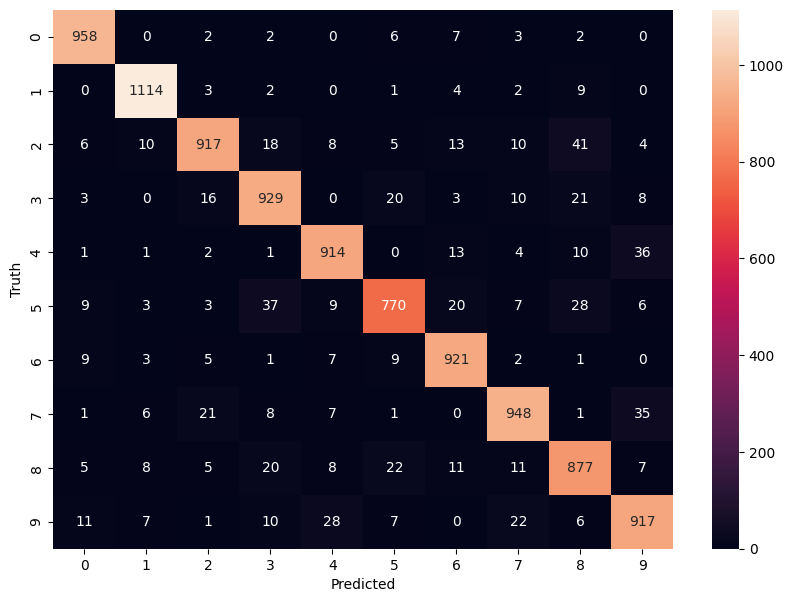

In [67]:
#visualize the confusion matrix in a more appealing way
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
#every number not in the diagonal are errors
# 22 times it was 9 but model predicted 7

In [71]:
#now let's add an hidden layer to get more accurate result
#and improved performance
#hidden layer doesn't need input shape, it can figure that out
# specify number of hidden layer from the first layer
#you use try and error to specify hidden layer and use activation function relu
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid')
])
#output layer 10
#activation as sigmoid, saved in model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"]
)

model.fit(X_train_flat, y_train, epochs = 5)

Epoch 1/5


2023-11-09 20:29:21.438847: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1215 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0662 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9841


In [72]:
# it will take longer to comile/train because of the hidden layer
# evaluate accuracy on test set
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9774


[0.07588602602481842, 0.977400004863739]

313/313 [==============================] - 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

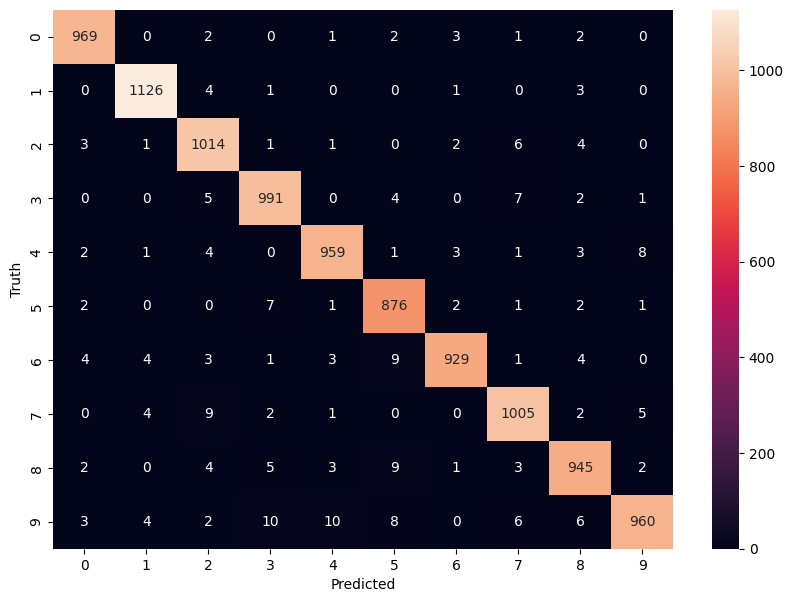

In [73]:
# our accuracy is now 97.74%
# now plot confusion matrix
y_pred =  model.predict(X_test_flat)
y_lab = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_lab)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [75]:
# number or errors has greatly reduced
# to escape creating flatten array, 
# use keras way of flattening your array
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid')
])
#output layer 10
#activation as sigmoid, saved in model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"]
)

model.fit(X_train, y_train, epochs = 5)


Epoch 1/5


2023-11-09 20:41:24.258678: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2769 - accuracy: 0.9206
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1240 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0864 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0647 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0511 - accuracy: 0.9843


In [ ]:
## Assignment, Google Keras loss,metric, epochs and activation and change them up